# KNN

### Results:
Tested various values of k and 7 or 9 was found to have the highest testing accuracy that was close to the training accuracy. Additional paramaters were  tested including weights (uniform and distance) and metrics (manhattan, euclidean, and minkowski). After using grid search CV, the best combination was found to be K=9, weight=uniform, and metric=manhattan with a training accuracy of 86% and testing of 85%.

When running PCA and KPCA, there was not a sginficant change in perfromance. The ideal number of components found which explained 95% of the variance in the data was 39. The training and testing accuarcy were 86% adn 84% respectively. KPCA had similar results so there was not a noticeable improvement over the standard method above.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
%pwd

'/Users/Abby/Documents/DePaul_MS_DS/DePaul Spring 2021/DSC 540/Project540/DSC-540---Advanced-Machine-Learning---Final-Project-main-7'

In [3]:
# os.chdir('/Users/Abby/Documents/DePaul_MS_DS/DePaul Spring 2021/DSC 540/Project540/Final_Project_github')
# os.getcwd()

In [3]:
hr_employee = pd.read_csv( './Data/HR_Employee.csv', delimiter = ",")
Attrition = pd.read_csv( './Data/Attrition.csv', delimiter = ",")

In [5]:
hr_employee

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,0.715820,0.000000,0.914286,0.698053,0.888889,0.000000,0.000000,0.200,0.000000,...,0,0,0,1,0,0,0,1,0,1
1,0.738095,0.126700,0.250000,0.442857,0.916001,0.111111,0.857143,0.333333,0.250,0.500000,...,0,0,1,0,0,0,1,0,1,0
2,0.452381,0.909807,0.035714,0.885714,0.012126,0.666667,0.285714,0.000000,0.175,0.500000,...,0,0,0,0,0,0,0,1,0,1
3,0.357143,0.923407,0.071429,0.371429,0.845814,0.111111,0.000000,0.000000,0.200,0.500000,...,0,0,1,0,0,0,1,0,0,1
4,0.214286,0.350036,0.035714,0.142857,0.583738,1.000000,0.071429,0.333333,0.150,0.500000,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.157143,0.409396,0.444444,0.428571,0.333333,0.425,0.500000,...,0,0,0,0,0,0,1,0,1,0
1466,0.500000,0.365784,0.178571,0.171429,0.777474,0.444444,0.285714,0.333333,0.225,0.833333,...,0,0,0,0,0,0,1,0,1,0
1467,0.214286,0.037938,0.107143,0.814286,0.123670,0.111111,0.642857,0.333333,0.150,0.000000,...,1,0,0,0,0,0,1,0,0,1
1468,0.738095,0.659270,0.035714,0.471429,0.447661,0.222222,0.214286,0.000000,0.425,0.500000,...,0,0,0,1,0,0,1,0,1,0


In [6]:
Attrition

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [7]:
print(hr_employee.shape)
print(hr_employee.info())

(1470, 69)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 69 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 1470 non-null   float64
 1   DailyRate                           1470 non-null   float64
 2   DistanceFromHome                    1470 non-null   float64
 3   HourlyRate                          1470 non-null   float64
 4   MonthlyRate                         1470 non-null   float64
 5   NumCompaniesWorked                  1470 non-null   float64
 6   PercentSalaryHike                   1470 non-null   float64
 7   StockOptionLevel                    1470 non-null   float64
 8   TotalWorkingYears                   1470 non-null   float64
 9   TrainingTimesLastYear               1470 non-null   float64
 10  YearsAtCompany                      1470 non-null   float64
 11  YearsInCurrentRole              

In [4]:
X = hr_employee
# Y = Attrition.values.ravel()
Y = Attrition

In [5]:
y = Y.Attrition
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [6]:
X.isnull()
X.isnull().sum()

Age                       0
DailyRate                 0
DistanceFromHome          0
HourlyRate                0
MonthlyRate               0
                         ..
MaritalStatus_Divorced    0
MaritalStatus_Married     0
MaritalStatus_Single      0
OverTime_No               0
OverTime_Yes              0
Length: 69, dtype: int64

In [7]:
y.isnull()
y.isnull().sum()

0

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1176, 69) (1176,)
(294, 69) (294,)


In [13]:
neighbors = KNeighborsClassifier(n_neighbors=1)
neighbors.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
#training accuracy
pred = neighbors.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred)

1.0

In [15]:
#testing accuracy
pred = neighbors.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred)

0.7925170068027211

In [16]:
# KNN model - iterating through list of K values ti find highest accuracy
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
accuracy_train = []
accuracy_test = []
for K in K_list:
    neighbors = KNeighborsClassifier(n_neighbors=K)
    # Code here
    neighbors.fit(X_train, np.ravel(y_train))
    #print('Iterations:',clf.n_iter_)
    pred=neighbors.predict(X_train)
    accuracy_train.append(metrics.accuracy_score(y_train, pred))
    pred=neighbors.predict(X_test)
    accuracy_test.append(metrics.accuracy_score(y_test, pred))

In [17]:
#training accuracy
pred = neighbors.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred)

0.8367346938775511

In [18]:
#testing accuracy
pred = neighbors.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred)

0.8469387755102041

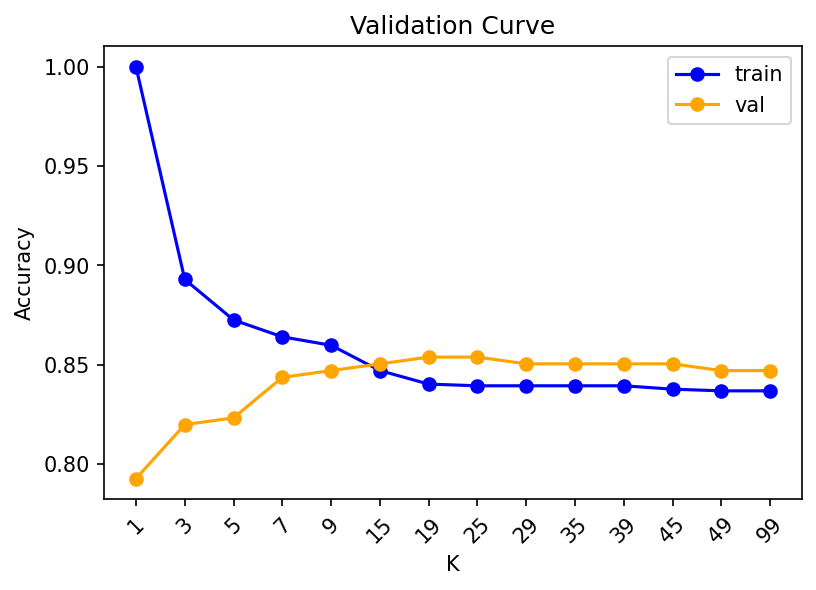

In [19]:
# Validation Curve - compare training and testing accuracies at each K value
f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train, marker='o', color='blue', label = 'train')
plt.plot(accuracy_test, color='orange', marker='o', label = 'val')
plt.title('Validation Curve')
plt.xticks(ticks=np.arange(len(K_list)), labels=K_list, rotation=45)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
neighbors = KNeighborsClassifier(n_neighbors=9)
neighbors.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=9)

In [21]:
#training accuracy
pred = neighbors.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred)

0.8596938775510204

In [22]:
#testing accuracy
pred = neighbors.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred)

0.8469387755102041

In [23]:
#confusion matrix
knncm = confusion_matrix(y_test, pred)
pd.DataFrame(metrics.confusion_matrix(y_test, pred))

,0,1
0,247,2
1,43,2


In [24]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       249
           1       0.50      0.04      0.08        45

    accuracy                           0.85       294
   macro avg       0.68      0.52      0.50       294
weighted avg       0.80      0.85      0.79       294



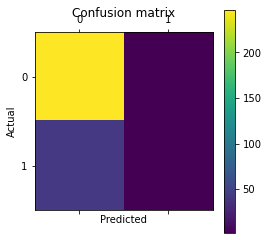

In [25]:
import pylab as plt
%matplotlib inline
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [26]:
neighbors = KNeighborsClassifier(n_neighbors=9, weights='distance')
neighbors.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [27]:
#training accuracy
pred = neighbors.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred)

1.0

In [28]:
#testing accuracy
pred = neighbors.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred)

0.8469387755102041

In [29]:
#confusion matrix
knncm = confusion_matrix(y_test, pred)
pd.DataFrame(metrics.confusion_matrix(y_test, pred))

,0,1
0,247,2
1,43,2


In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       249
           1       0.50      0.04      0.08        45

    accuracy                           0.85       294
   macro avg       0.68      0.52      0.50       294
weighted avg       0.80      0.85      0.79       294



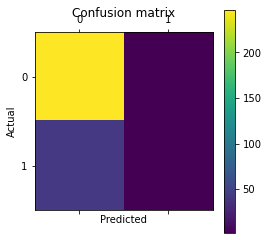

In [31]:
import pylab as plt
%matplotlib inline
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Grid Search KNN

In [32]:
params = dict(
    n_neighbors = [1,3,5,7,9,15,19,25,29,35,39,45,49,99],
    weights = ['uniform', 'distance'],
    metric = ['minkowski', 'euclidean', 'manhattan']
)

params

{'n_neighbors': [1, 3, 5, 7, 9, 15, 19, 25, 29, 35, 39, 45, 49, 99],
 'weights': ['uniform', 'distance'],
 'metric': ['minkowski', 'euclidean', 'manhattan']}

In [33]:
neighbors = KNeighborsClassifier()
gs = GridSearchCV(estimator=neighbors, param_grid=params, cv=5, n_jobs=-1, )
gs

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 15, 19, 25, 29, 35, 39,
                                         45, 49, 99],
                         'weights': ['uniform', 'distance']})

In [34]:
gs.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 15, 19, 25, 29, 35, 39,
                                         45, 49, 99],
                         'weights': ['uniform', 'distance']})

In [35]:
gs.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [36]:
gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

In [37]:
best_estimator = gs.best_estimator_
pred = best_estimator.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.8401360544217688

In [85]:
neighbors = KNeighborsClassifier(n_neighbors=9, metric='manhattan', weights='uniform')
neighbors.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [86]:
#training accuracy
pred = neighbors.predict(X_train)
metrics.accuracy_score(y_train, pred)

0.8605442176870748

In [87]:
#testing accuracy
pred = neighbors.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.8537414965986394

In [41]:
#confusion matrix
knncm = confusion_matrix(y_test, pred)
pd.DataFrame(metrics.confusion_matrix(y_test, pred))

,0,1
0,248,1
1,42,3


In [42]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       249
           1       0.75      0.07      0.12        45

    accuracy                           0.85       294
   macro avg       0.80      0.53      0.52       294
weighted avg       0.84      0.85      0.80       294



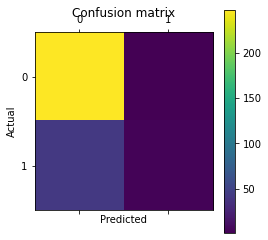

In [43]:
import pylab as plt
%matplotlib inline
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [44]:
tn, fp, fn, tp = metrics.confusion_matrix(y_true = y_test, y_pred = pred).ravel()
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = 2 * (recall * precision)/(recall + precision)
specificity = tn/(tn+fp)
balanced_accuracy = (specificity + recall)/2
print(" Recall:",recall.round(2),"\n","Precision:",precision.round(2),"\n","Specificity:",specificity.round(2),"\n","F1-score:",f1.round(2),"\n","Balanced Accuracy:", balanced_accuracy.round(2))

 Recall: 0.07 
 Precision: 0.75 
 Specificity: 1.0 
 F1-score: 0.12 
 Balanced Accuracy: 0.53


In [58]:
from sklearn.metrics import confusion_matrix
# Function:    confusionMatrix
# Input:       Training/Testing dataframe and predictions
# Output:      Prints Formatted Confusion Matrix
# Returns:     Confusion Matrix Array
# URL:         https://towardsdatascience.com/evaluating-machine-learning-classification-problems-in-python-5-1-metrics-that-matter-792c6faddf5
def confusionMatrix(true, pred):
    cm = confusion_matrix(true, pred.round(), normalize=None)

    # Assigning columns names
    cm_df = pd.DataFrame(cm,
                        columns = ['Predicted Negative', 'Predicted Positive'],
                        index = ['Actual Negative', 'Actual Positive'])

    # Printing Formatted Confusion Matrix
    print('\n',cm_df)

    return cm

In [65]:
# Function:    heatMap
# Input:       true y values, predicted y values
# Output:      Heat Map Of Confusion Matrix
def heatMap(y_true, y_pred):
    cm_plot =  pd.crosstab(index=y_true.values.ravel(), columns=y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(cm_plot, annot=True, square=False, fmt='', cbar=False)
    plt.title("Confusion Matrix", fontsize = 15)
    plt.show()

In [59]:
# Print Confusion Matrix
cm = confusionMatrix(y_test, pred)


                  Predicted Negative  Predicted Positive
Actual Negative                 248                   1
Actual Positive                  41                   4


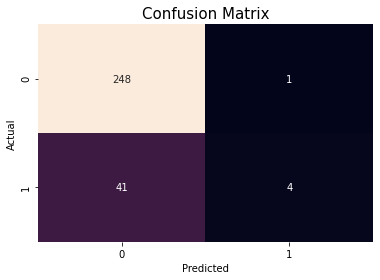

In [66]:
# Heat Map
heatMap(y_test, pred)

### PCA

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [47]:
from sklearn.linear_model import LinearRegression
scores_pca = []
lr = LinearRegression()

for i in range(1, 10):
    #pca = PCA(n_components=i, random_state=0)
    #X_train2 = pca.fit_transform(X_train)
    #X_val2 = pca.transform(X_val)
    score = lr.fit(X_train_pca, y_train).score(X_test_pca, y_test)
    scores_pca.append(score)

[0.06837425 0.12242703 0.16864991 0.21365489 0.25642235 0.29742148
 0.33534554 0.37285774 0.40960059 0.44447785 0.47829769 0.51059282
 0.54165392 0.57203446 0.59898067 0.62482333 0.64933973 0.67333282
 0.69552676 0.71686341 0.73753634 0.75707909 0.77450266 0.79019599
 0.80512829 0.8196687  0.83399264 0.84680549 0.85924636 0.87089277
 0.88135352 0.89112091 0.90058011 0.90969978 0.91859221 0.92698967
 0.93520395 0.94288359 0.94985398 0.95676201 0.96316303 0.96932295
 0.97452528 0.97929528 0.98326274 0.98690889 0.9900663  0.99251499
 0.99488669 0.99628265 0.99748901 0.99841323 0.99910646 0.99959009
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]


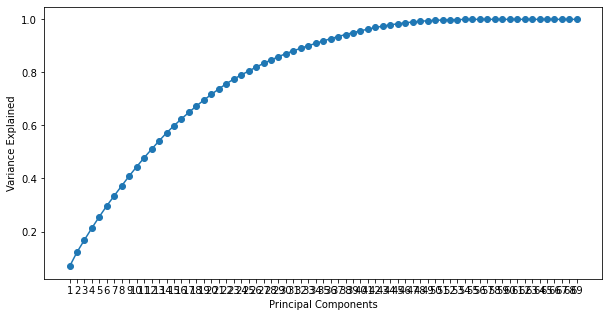

In [48]:
np.set_printoptions(threshold=np.inf)
print(pca.explained_variance_ratio_.cumsum())
fig = plt.figure(figsize=(10, 5))
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train.shape[1]), labels=[i+1 for i in range(X_train.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [49]:
pca = PCA(n_components=39)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
#X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [50]:
# neighbors = KNeighborsClassifier(n_neighbors=9, metric='manhattan', weights='uniform')
# neighbors.fit(X_train_pca, np.ravel(y_train))

In [51]:
neighbors = KNeighborsClassifier()
neighbors.fit(X_train_pca, (y_train))

KNeighborsClassifier()

In [52]:
#training accuracy
pred = neighbors.predict(X_train_pca)
metrics.accuracy_score(y_train, pred)

0.8673469387755102

In [53]:
#testing accuracy
pred = neighbors.predict(X_test_pca)
metrics.accuracy_score(y_test, pred)

0.8333333333333334

In [54]:
# Grid Search
params = dict(
    n_neighbors = [1,3,5,7,9,11,13,15,19,25,29,35,39,45,49,99],
    weights = ['uniform', 'distance'],
    metric = ['minkowski', 'euclidean', 'manhattan']
)

params

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 19, 25, 29, 35, 39, 45, 49, 99],
 'weights': ['uniform', 'distance'],
 'metric': ['minkowski', 'euclidean', 'manhattan']}

In [55]:
neighbors = KNeighborsClassifier()
gs = GridSearchCV(estimator=neighbors, param_grid=params, cv=5, n_jobs=-1, )
gs

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 19, 25, 29,
                                         35, 39, 45, 49, 99],
                         'weights': ['uniform', 'distance']})

In [56]:
gs.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 19, 25, 29,
                                         35, 39, 45, 49, 99],
                         'weights': ['uniform', 'distance']})

In [57]:
gs.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [58]:
gs.best_params_

{'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'uniform'}

In [79]:
neighbors = KNeighborsClassifier(n_neighbors=7, metric='minkowski', weights='uniform')
neighbors.fit(X_train_pca, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=7)

In [80]:
#training accuracy
pred = neighbors.predict(X_train_pca)
metrics.accuracy_score(y_train, pred)

0.8622448979591837

In [81]:
#testing accuracy
pred = neighbors.predict(X_test_pca)
metrics.accuracy_score(y_test, pred)

0.8367346938775511

In [62]:
#confusion matrix
knncm = confusion_matrix(y_test, pred)
pd.DataFrame(metrics.confusion_matrix(y_test, pred))

,0,1
0,247,2
1,42,3


In [63]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       249
           1       0.60      0.07      0.12        45

    accuracy                           0.85       294
   macro avg       0.73      0.53      0.52       294
weighted avg       0.82      0.85      0.80       294



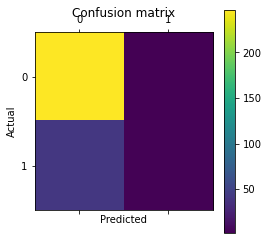

In [64]:
import pylab as plt
%matplotlib inline
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [65]:
tn, fp, fn, tp = metrics.confusion_matrix(y_true = y_test, y_pred = pred).ravel()
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = 2 * (recall * precision)/(recall + precision)
specificity = tn/(tn+fp)
balanced_accuracy = (specificity + recall)/2
print(" Recall:",recall.round(2),"\n","Precision:",precision.round(2),"\n","Specificity:",specificity.round(2),"\n","F1-score:",f1.round(2),"\n","Balanced Accuracy:", balanced_accuracy.round(2))

 Recall: 0.07 
 Precision: 0.6 
 Specificity: 0.99 
 F1-score: 0.12 
 Balanced Accuracy: 0.53


### KPCA

In [66]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [67]:
kpca = KernelPCA(n_components=None, kernel='rbf', n_jobs=-1, remove_zero_eig=True)
kpca.fit(X_train)
X_train_kpca = kpca.transform(X_train)
X_test_kpca = kpca.transform(X_test)

In [68]:
neighbors = KNeighborsClassifier()
neighbors.fit(X_train_kpca, np.ravel(y_train))

KNeighborsClassifier()

In [69]:
#training accuracy
pred = neighbors.predict(X_train_kpca)
metrics.accuracy_score(y_train, pred)

0.8724489795918368

In [70]:
#testing accuracy
pred = neighbors.predict(X_test_kpca)
metrics.accuracy_score(y_test, pred)

0.8231292517006803

In [71]:
# Grid Search
params = dict(
    n_neighbors = [1,3,5,7,9,11,13,15,19,25,29,35,39,45,49,99],
    weights = ['uniform', 'distance'],
    metric = ['minkowski', 'euclidean', 'manhattan']
)

params

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 19, 25, 29, 35, 39, 45, 49, 99],
 'weights': ['uniform', 'distance'],
 'metric': ['minkowski', 'euclidean', 'manhattan']}

In [72]:
neighbors = KNeighborsClassifier()
gs = GridSearchCV(estimator=neighbors, param_grid=params, cv=5, n_jobs=-1, )
gs

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 19, 25, 29,
                                         35, 39, 45, 49, 99],
                         'weights': ['uniform', 'distance']})

In [73]:
gs.fit(X_train_kpca, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 19, 25, 29,
                                         35, 39, 45, 49, 99],
                         'weights': ['uniform', 'distance']})

In [74]:
gs.best_estimator_

KNeighborsClassifier()

In [75]:
gs.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}

In [96]:
neighbors = KNeighborsClassifier(n_neighbors=7, metric='minkowski', weights='uniform')
neighbors.fit(X_train_kpca, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=7)

In [97]:
#training accuracy
pred = neighbors.predict(X_train_kpca)
metrics.accuracy_score(y_train, pred)

0.8639455782312925

In [98]:
#testing accuracy
pred = neighbors.predict(X_test_kpca)
metrics.accuracy_score(y_test, pred)

0.8435374149659864

In [91]:
#confusion matrix
knncm = confusion_matrix(y_test, pred)
pd.DataFrame(metrics.confusion_matrix(y_test, pred))

,0,1
0,237,12
1,40,5


In [92]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       249
           1       0.29      0.11      0.16        45

    accuracy                           0.82       294
   macro avg       0.57      0.53      0.53       294
weighted avg       0.77      0.82      0.79       294



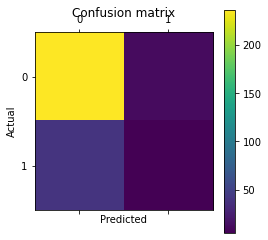

In [94]:
import pylab as plt
%matplotlib inline
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [95]:
tn, fp, fn, tp = metrics.confusion_matrix(y_true = y_test, y_pred = pred).ravel()
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = 2 * (recall * precision)/(recall + precision)
specificity = tn/(tn+fp)
balanced_accuracy = (specificity + recall)/2
print(" Recall:",recall.round(2),"\n","Precision:",precision.round(2),"\n","Specificity:",specificity.round(2),"\n","F1-score:",f1.round(2),"\n","Balanced Accuracy:", balanced_accuracy.round(2))

 Recall: 0.11 
 Precision: 0.29 
 Specificity: 0.95 
 F1-score: 0.16 
 Balanced Accuracy: 0.53
